## Figure 3
Distribution of parameter values from MCMC calibration.
Each row shows a different model (OV, SL, RU). Each column shows a different parameter (sigma_org, delta_min / A0, C0, m_sigma).
In the title of each subplot is the best fit and 95% CI for each parameter value.

In [1]:
import numpy as np
import os

from open_atmos_jupyter_utils import show_plot
from matplotlib import pyplot

from PySDM import Formulae
from PySDM.physics import si

from PySDM_examples.Singer_Ward.aerosol import AerosolBetaCaryophylleneDark
from PySDM_examples.Singer_Ward.kappa_mcmc import param_transform, model_options
from PySDM_examples.Singer_Ward.constants_def import SINGER_CONSTS, plot_colors, plot_names
from PySDM_examples.Singer_Ward.read_mcmc import get_converged_parameter_values

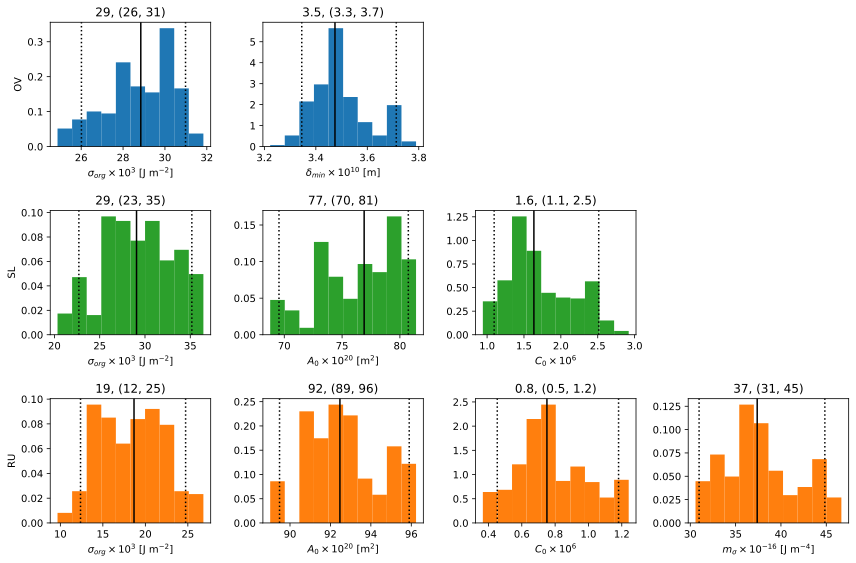

HTML(value="<a href='./fig3.pdf' target='_blank'>./fig3.pdf</a><br>")

In [3]:
# aerosol creation
FORMULAE = Formulae(constants=SINGER_CONSTS)
WATER_MOLAR_VOLUME = FORMULAE.constants.water_molar_volume
aerosol = AerosolBetaCaryophylleneDark(water_molar_volume=WATER_MOLAR_VOLUME, Forg=0.5, N_a=200)

fig, axes = pyplot.subplots(3, 4, figsize=(12,8))

for i, model in enumerate(("CompressedFilmOvadnevaite", "SzyszkowskiLangmuir", "CompressedFilmRuehl")):
    Ntotal, Ncut = 1000, 500
    data = get_converged_parameter_values(model, aerosol, Ntotal, Ncut)

    labels, scaling, plot_order = model_options(model)

    axes[i,0].set_ylabel(plot_names[model])

    for j in range(data.shape[1]):
        dj = data[:, j] * scaling[j]
        ax = axes[i, plot_order[j]]

        ax.hist(dj, color=plot_colors[model], density=True)
        ax.set_xlabel(labels[j])
        if j == 1:
            ax.set_title(f"{np.quantile(dj, 0.5):.1f}, ({np.quantile(dj, 0.05):.1f}, {np.quantile(dj, 0.95):.1f})")
        else:
            ax.set_title(f"{np.quantile(dj, 0.5):.0f}, ({np.quantile(dj, 0.05):.0f}, {np.quantile(dj, 0.95):.0f})")
        
        ax.axvline(np.quantile(dj, 0.5), ls="-", color="k")
        ax.axvline(np.quantile(dj, 0.05), ls=":", color="k")
        ax.axvline(np.quantile(dj, 0.95), ls=":", color="k")

axes[0, 2].remove()
axes[0, 3].remove()
axes[1, 3].remove()

pyplot.tight_layout()
show_plot("fig3.pdf")